In my Capstone project I analyse InstaCart Online Grocery Baskets. The main question that this project aims to address is how to optimize the product offerings of retailers by identifying customer behavior. By predicting if a customer has a healthy product basket based on the product names and clustering customers based on their product baskets, this project aims to provide insights into how retail should approach next best offer. The goal is to increase profits for retailers by better understanding and targeting the needs and preferences of their customers.


__Please note: this is notebook 1 of 5.__


In this notebook, I conducted data cleaning and exploratory data analysis (EDA) to prepare the data for subsequent analysis and modeling.

I have to create my target variable which is "healthy/unhealthy product basket". For this purpose I will work with aisles to identify healthy/unhealthy products and calculate healthy product share in each basket.

I will merge tables together and do feature engineering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
%matplotlib inline

In [39]:
import session_info
session_info.show()

In [2]:
# download datatable with order_id and product_id

order_product = pd.read_csv('/Users/evgenijkucukov/Desktop/Brainstation/Capstone/Instacart/order_products__train.csv')

In [3]:
order_product.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [4]:
order_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [5]:
# download datatable with product_id and product_name, aisle_id and department_id

product = pd.read_csv('/Users/evgenijkucukov/Desktop/Brainstation/Capstone/Instacart/products.csv')

In [6]:
product.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [7]:
# merger 2 tables on product_id

order_product_name = pd.merge(order_product, product, on='product_id', how = 'left')

In [8]:
order_product_name.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
2,1,10246,3,0,Organic Celery Hearts,83,4
3,1,49683,4,0,Cucumber Kirby,83,4
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15


In [9]:
# download datatable with a user_id information

order = pd.read_csv('/Users/evgenijkucukov/Desktop/Brainstation/Capstone/Instacart/orders.csv')

In [10]:
order.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [11]:
# merger mergered table with user_id info on product_id

order_prodact_name_final1 = pd.merge(order_product_name, order, on = 'order_id', how = 'left')

In [12]:
order_prodact_name_final1

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,112108,train,4,4,10,9.0
2,1,10246,3,0,Organic Celery Hearts,83,4,112108,train,4,4,10,9.0
3,1,49683,4,0,Cucumber Kirby,83,4,112108,train,4,4,10,9.0
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,112108,train,4,4,10,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,3421063,14233,3,1,Natural Artesian Water,115,7,169679,train,30,0,10,4.0
1384613,3421063,35548,4,1,Twice Baked Potatoes,13,20,169679,train,30,0,10,4.0
1384614,3421070,35951,1,1,Organic Unsweetened Almond Milk,91,16,139822,train,15,6,10,8.0
1384615,3421070,16953,2,1,Creamy Peanut Butter,88,13,139822,train,15,6,10,8.0


In [13]:
# add aisle names

aisles = pd.read_csv('/Users/evgenijkucukov/Desktop/Brainstation/Capstone/Instacart/aisles.csv')

In [14]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [15]:
order_prodact_name_final2 = pd.merge(order_prodact_name_final1, aisles, on='aisle_id', how = 'left')

In [16]:
# add department names

dep = pd.read_csv('/Users/evgenijkucukov/Desktop/Brainstation/Capstone/Instacart/departments.csv')

In [17]:
dep.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [18]:
# merge tables

order_prodact_name_final = pd.merge(order_prodact_name_final2, dep, on='department_id', how = 'left')

In [19]:
order_prodact_name_final

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,yogurt,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,112108,train,4,4,10,9.0,other creams cheeses,dairy eggs
2,1,10246,3,0,Organic Celery Hearts,83,4,112108,train,4,4,10,9.0,fresh vegetables,produce
3,1,49683,4,0,Cucumber Kirby,83,4,112108,train,4,4,10,9.0,fresh vegetables,produce
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,112108,train,4,4,10,9.0,canned meat seafood,canned goods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,3421063,14233,3,1,Natural Artesian Water,115,7,169679,train,30,0,10,4.0,water seltzer sparkling water,beverages
1384613,3421063,35548,4,1,Twice Baked Potatoes,13,20,169679,train,30,0,10,4.0,prepared meals,deli
1384614,3421070,35951,1,1,Organic Unsweetened Almond Milk,91,16,139822,train,15,6,10,8.0,soy lactosefree,dairy eggs
1384615,3421070,16953,2,1,Creamy Peanut Butter,88,13,139822,train,15,6,10,8.0,spreads,pantry


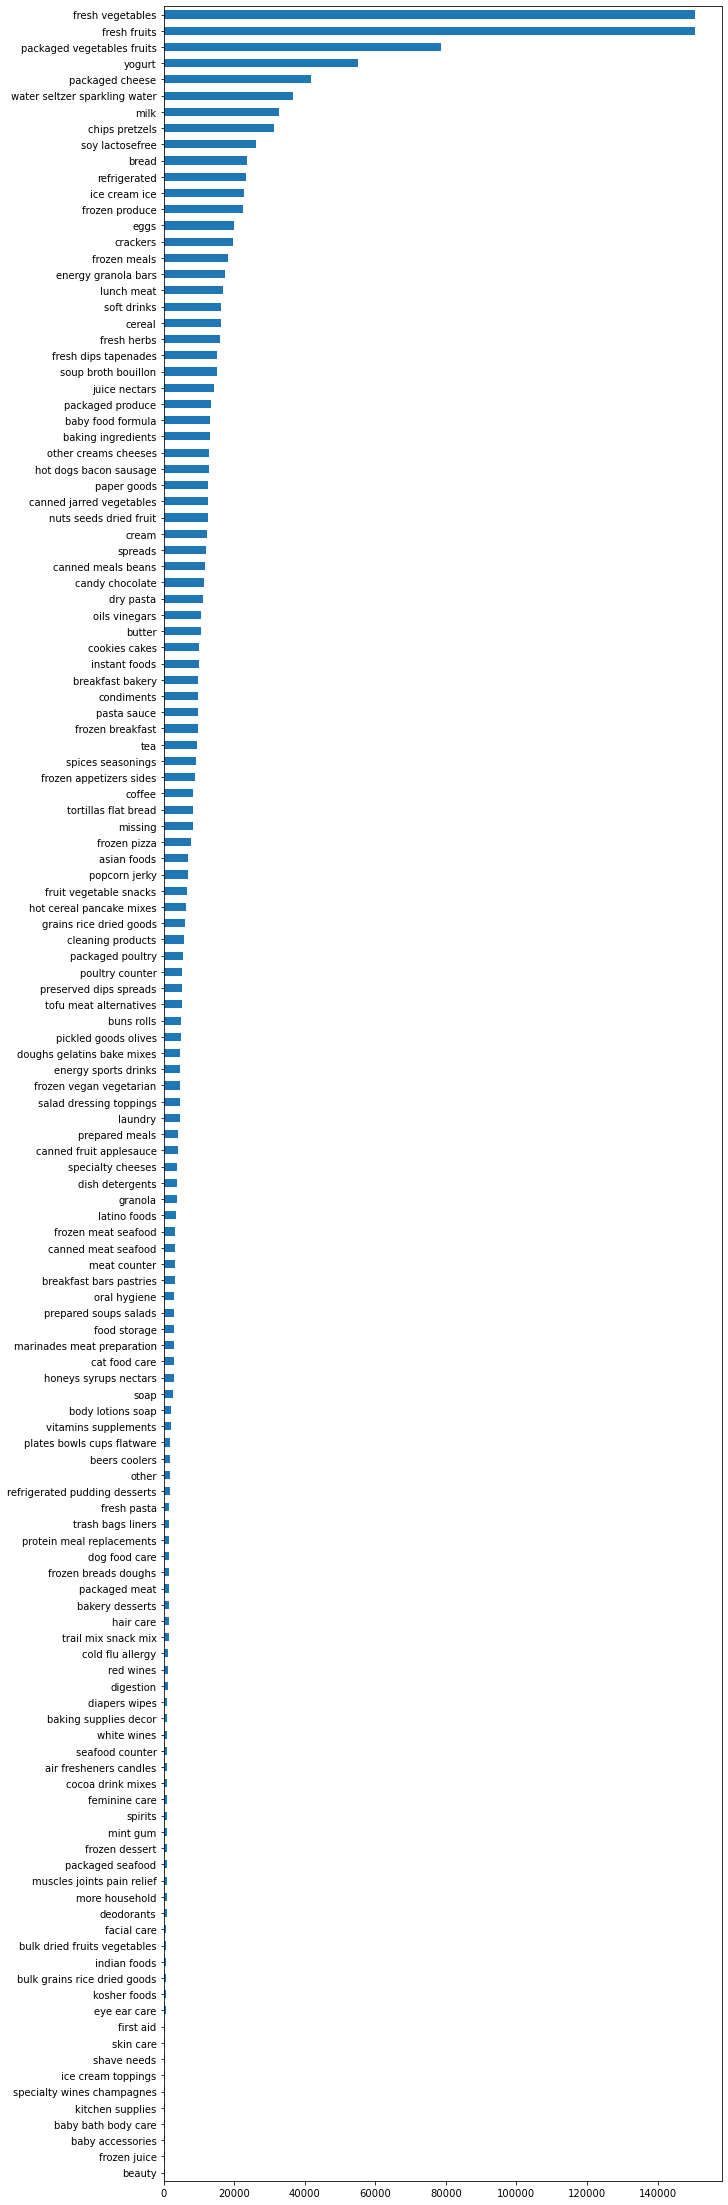

In [20]:
# check the most popular categories of food
ailes_share = order_prodact_name_final['aisle'].value_counts()/order_prodact_name_final.shape[0]*100
order_prodact_name_final['aisle'].value_counts().sort_values().plot(kind = 'barh', figsize =(10, 40))

The most popular aisle are fresh vegetables, fresh fruits, packaged vegetables fruits, yogurt and packaged cheese.

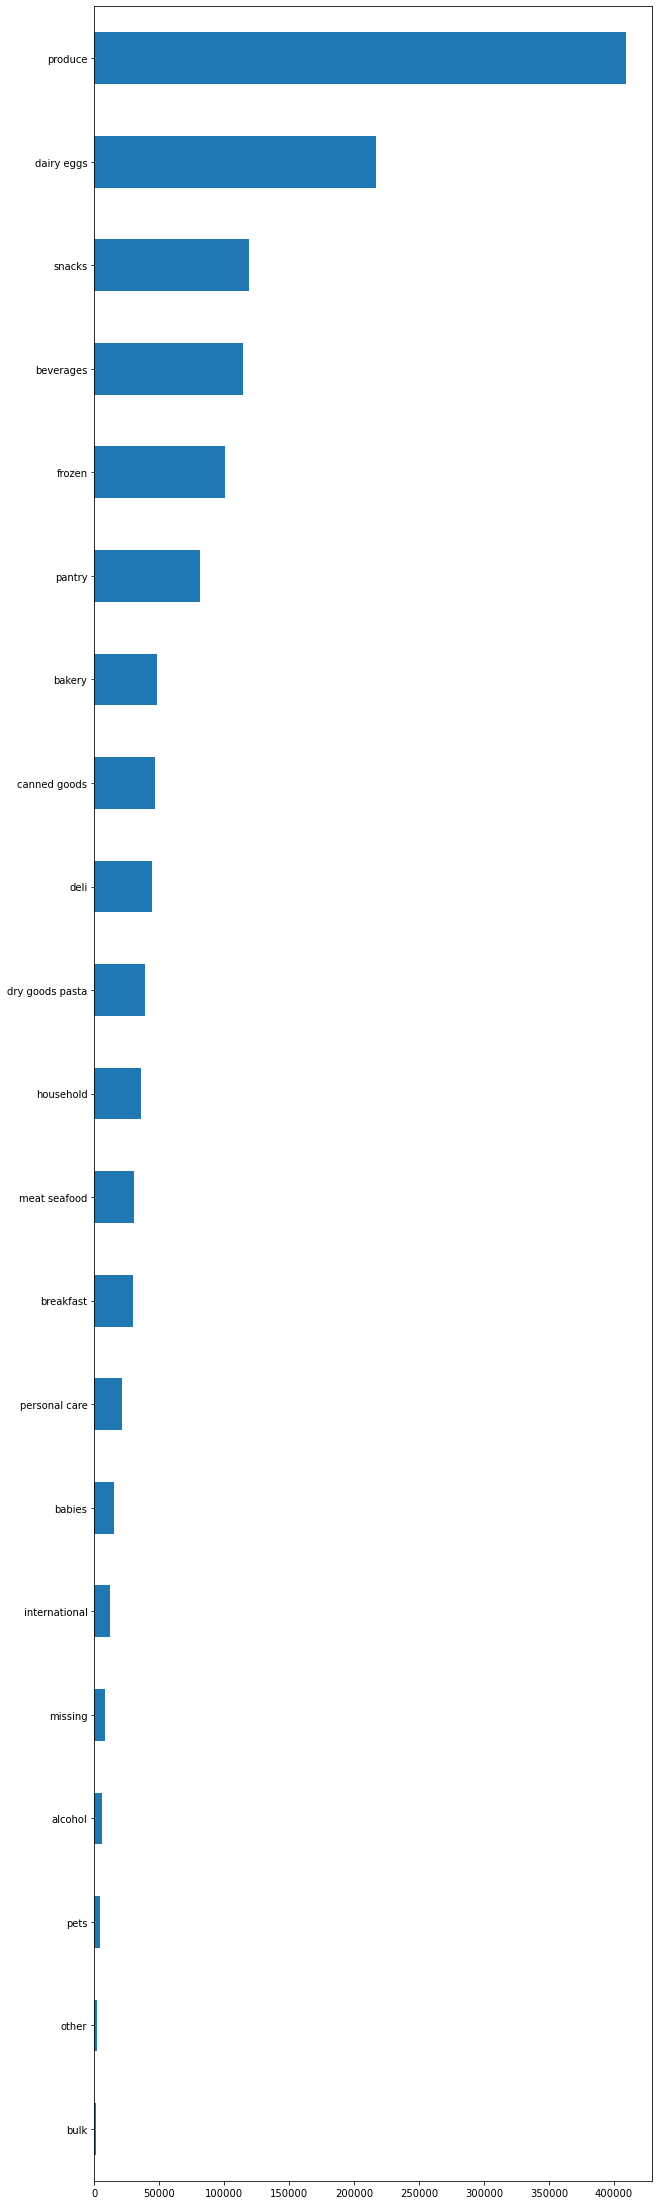

In [21]:
# check the most popular categories of food
department_share = order_prodact_name_final['department'].value_counts()/order_prodact_name_final.shape[0]*100
order_prodact_name_final['department'].value_counts().sort_values().plot(kind = 'barh', figsize =(10, 40))

The most popular departments are produced, dairy eggs, snacks and beverages.

For further analysis I need to identify items as food/non-food and healthy/unhealthy.

In [22]:
order_prodact_name_final['aisle'].unique()

array(['yogurt', 'other creams cheeses', 'fresh vegetables',
       'canned meat seafood', 'fresh fruits', 'packaged cheese',
       'specialty cheeses', 'water seltzer sparkling water', 'cream',
       'packaged vegetables fruits', 'eggs', 'lunch meat',
       'nuts seeds dried fruit', 'oils vinegars', 'frozen produce',
       'fresh herbs', 'refrigerated', 'refrigerated pudding desserts',
       'canned jarred vegetables', 'soy lactosefree', 'crackers',
       'hot dogs bacon sausage', 'frozen appetizers sides', 'butter',
       'fresh dips tapenades', 'canned meals beans', 'ice cream ice',
       'dish detergents', 'milk', 'canned fruit applesauce',
       'frozen meat seafood', 'baking ingredients', 'laundry',
       'soup broth bouillon', 'condiments', 'juice nectars',
       'tortillas flat bread', 'soap', 'plates bowls cups flatware',
       'food storage', 'paper goods', 'chips pretzels', 'pasta sauce',
       'muscles joints pain relief', 'cold flu allergy', 'bread',
       'g

In [23]:
# check what products are in the missing aisle 
missing = order_prodact_name_final[order_prodact_name_final['aisle']=='missing']
missing

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
120,226,47307,7,0,"Magic Tape Refillable Dispenser 3/4\"" x 850\""",100,21,51011,train,4,0,12,30.0,missing,missing
174,631,37307,12,0,Organic Asian Chopped Salad Kit,100,21,184099,train,7,3,9,30.0,missing,missing
441,1579,35000,1,1,Apple Frank Organic Beef,100,21,94042,train,11,5,15,0.0,missing,missing
472,1591,38805,27,0,Twisted Tropical Tango Organic Juice Drink,100,21,188528,train,31,2,17,6.0,missing,missing
598,1983,7035,4,0,Peanut Butter Ice Cream Cup,100,21,134295,train,55,1,10,21.0,missing,missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383904,3419531,24974,12,1,Caramel Custard Yogurt,100,21,43300,train,32,2,15,6.0,missing,missing
1383946,3419601,27767,5,1,Plain Organic Grassmilk Yogurt Cup,100,21,109812,train,89,5,20,6.0,missing,missing
1384209,3420257,41149,26,1,Organic Riced Cauliflower,100,21,92532,train,35,6,17,7.0,missing,missing
1384212,3420257,15576,29,0,Uncured Beef Hot Dog,100,21,92532,train,35,6,17,7.0,missing,missing


In [24]:
# create column to identify food and non food goods
order_prodact_name_final['food'] = order_prodact_name_final['aisle'].apply(lambda x: 0 if x in ('dish detergents', 'food storage', 'muscles joints pain relief', 
                                                                                                'baby accessories', 'cleaning products', 'dog food care', 'kitchen supplies', 
                                                                                                'vitamins supplements', 'shave needs', 'cat food care', 'skin care', 'beauty', 
                                                                                                'soap, paper goods', 'paper goods', 'cold flu allergy', 'deodorants', 
                                                                                                'body lotions soap', 'hair care', 'facial care', 'feminine care', 
                                                                                                'laundry', 'plates bowls cups flatware', 'other', 'diapers wipes', 
                                                                                                'oral hygiene', 'baby food formula', 'trash bags liners',
                                                                                                'beers coolers', 'air fresheners candles', 'eye ear care',
                                                                                                'digestion', 'more household', 'first aid') else 1)

In [25]:
# sanity check
order_prodact_name_final['food'].value_counts()

1    1308702
0      75915
Name: food, dtype: int64

In [26]:
# create column to identify healthy and unhealthy products 
order_prodact_name_final['healthy'] = order_prodact_name_final['aisle'].apply(lambda x: 1 if x in ('yogurt', 'canned meat seafood','specialty cheeses', 
                                                                                                   'packaged vegetables fruits', 'nuts seeds dried fruit',
                                                                                                   'fresh herbs', 'canned jarred vegetables', 'fresh dips tapenades',
                                                                                                   'frozen meat seafood', 'soup broth bouillon', 'grains rice dried goods', 
                                                                                                   'packaged produce', 'fresh pasta', 'packaged meat', 'tea', 'coffee', 
                                                                                                   'packaged seafood', 'packaged poultry', 'cocoa drink mixes', 
                                                                                                   'other creams cheeses', 'fresh fruits', 'water seltzer sparkling water', 
                                                                                                   'eggs', 'oils vinegars', 'soy lactosefree', 'canned meals beans', 'milk', 
                                                                                                   'spices seasonings', 'energy granola bars', 'buns rolls', 'cereal', 
                                                                                                   'fruit vegetable snacks', 'bulk grains rice dried goods', 'meat counter', 
                                                                                                   'granola', 'salad dressing toppings', 'seafood counter', 'kosher foods', 
                                                                                                   'bulk dried fruits vegetables', 'fresh vegetables', 'packaged cheese', 
                                                                                                   'cream', 'frozen produce', 'butter', 'pickled goods olives', 'dry pasta', 
                                                                                                   'tofu meat alternatives', 'protein meal replacements', 'poultry counter') else 0)

In [27]:
# sanity check
order_prodact_name_final['healthy'].value_counts()

1    900151
0    484466
Name: healthy, dtype: int64

Now I create feature to identify healthy or unhealthy product baskets.

I consider basket healthy if it consists of more then 80% of healthy products.

In [28]:
# calculate a share of healthy product in the order
healthy_share = order_prodact_name_final.groupby('order_id')['healthy'].mean()

In [29]:
order_prodact_name_final['healthy_product_share'] = order_prodact_name_final['order_id'].map(healthy_share)


In [30]:
# create boolean column 

order_prodact_name_final['healthy_basket'] = order_prodact_name_final['healthy_product_share'].apply(lambda x: 1 if x >= 0.8 else 0)

In [31]:
# sanity check

order_prodact_name_final

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department,food,healthy,healthy_product_share,healthy_basket
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,yogurt,dairy eggs,1,1,1.000000,1
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,112108,train,4,4,10,9.0,other creams cheeses,dairy eggs,1,1,1.000000,1
2,1,10246,3,0,Organic Celery Hearts,83,4,112108,train,4,4,10,9.0,fresh vegetables,produce,1,1,1.000000,1
3,1,49683,4,0,Cucumber Kirby,83,4,112108,train,4,4,10,9.0,fresh vegetables,produce,1,1,1.000000,1
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,112108,train,4,4,10,9.0,canned meat seafood,canned goods,1,1,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,3421063,14233,3,1,Natural Artesian Water,115,7,169679,train,30,0,10,4.0,water seltzer sparkling water,beverages,1,1,0.500000,0
1384613,3421063,35548,4,1,Twice Baked Potatoes,13,20,169679,train,30,0,10,4.0,prepared meals,deli,1,0,0.500000,0
1384614,3421070,35951,1,1,Organic Unsweetened Almond Milk,91,16,139822,train,15,6,10,8.0,soy lactosefree,dairy eggs,1,1,0.666667,0
1384615,3421070,16953,2,1,Creamy Peanut Butter,88,13,139822,train,15,6,10,8.0,spreads,pantry,1,0,0.666667,0


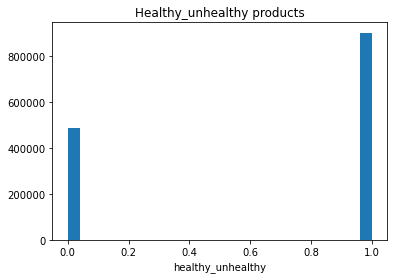

In [32]:
# check distribution of healthy/unhealthy products
plt.figure()
plt.hist(order_prodact_name_final['healthy'], bins=25)
plt.title('Healthy_unhealthy products')
plt.xlabel('healthy_unhealthy')
plt.show()

In [33]:
order_prodact_name_final['healthy'].value_counts()

1    900151
0    484466
Name: healthy, dtype: int64

Although, the number of healthy product is 2 times greater then numbet of unhealthy products, the datsbase looks balanced. 

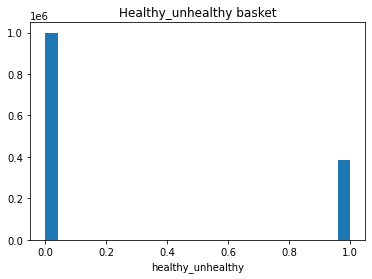

In [34]:
# check distribution of healthy/unhealthy baskets
plt.figure()
plt.hist(order_prodact_name_final['healthy_basket'], bins=25)
plt.title('Healthy_unhealthy basket')
plt.xlabel('healthy_unhealthy')
plt.show()

In [35]:
order_prodact_name_final['healthy_basket'].value_counts()

0    998821
1    385796
Name: healthy_basket, dtype: int64

In [36]:
# save file

order_prodact_name_final.to_csv('order_prodact_name_final', index=False)

In [37]:
# for predicting healthy/unhealthy basket filter table only with food

order_prodact_name_wo_nonfood = order_prodact_name_final[order_prodact_name_final['food'] == 1]
order_prodact_name_wo_nonfood

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department,food,healthy,healthy_product_share,healthy_basket
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,yogurt,dairy eggs,1,1,1.000000,1
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,112108,train,4,4,10,9.0,other creams cheeses,dairy eggs,1,1,1.000000,1
2,1,10246,3,0,Organic Celery Hearts,83,4,112108,train,4,4,10,9.0,fresh vegetables,produce,1,1,1.000000,1
3,1,49683,4,0,Cucumber Kirby,83,4,112108,train,4,4,10,9.0,fresh vegetables,produce,1,1,1.000000,1
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,112108,train,4,4,10,9.0,canned meat seafood,canned goods,1,1,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,3421063,14233,3,1,Natural Artesian Water,115,7,169679,train,30,0,10,4.0,water seltzer sparkling water,beverages,1,1,0.500000,0
1384613,3421063,35548,4,1,Twice Baked Potatoes,13,20,169679,train,30,0,10,4.0,prepared meals,deli,1,0,0.500000,0
1384614,3421070,35951,1,1,Organic Unsweetened Almond Milk,91,16,139822,train,15,6,10,8.0,soy lactosefree,dairy eggs,1,1,0.666667,0
1384615,3421070,16953,2,1,Creamy Peanut Butter,88,13,139822,train,15,6,10,8.0,spreads,pantry,1,0,0.666667,0


In [38]:
# save a table as csv

order_prodact_name_wo_nonfood.to_csv('order_prodact_name_wo_nonfood', index=False)

I have acquired a well-balanced dataset, suitable for further analysis. To facilitate my investigation, I have created two separate tables. The first table contains food items that will be used as input to my classification model, which aims to predict a healthy product basket. The second table comprises all the items necessary for conducting market basket analysis and clustering.